<a href="https://colab.research.google.com/github/baovin/ML_homework/blob/main/Copy_of_Inclass_Lab01_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gridworld Simulator


![image.png](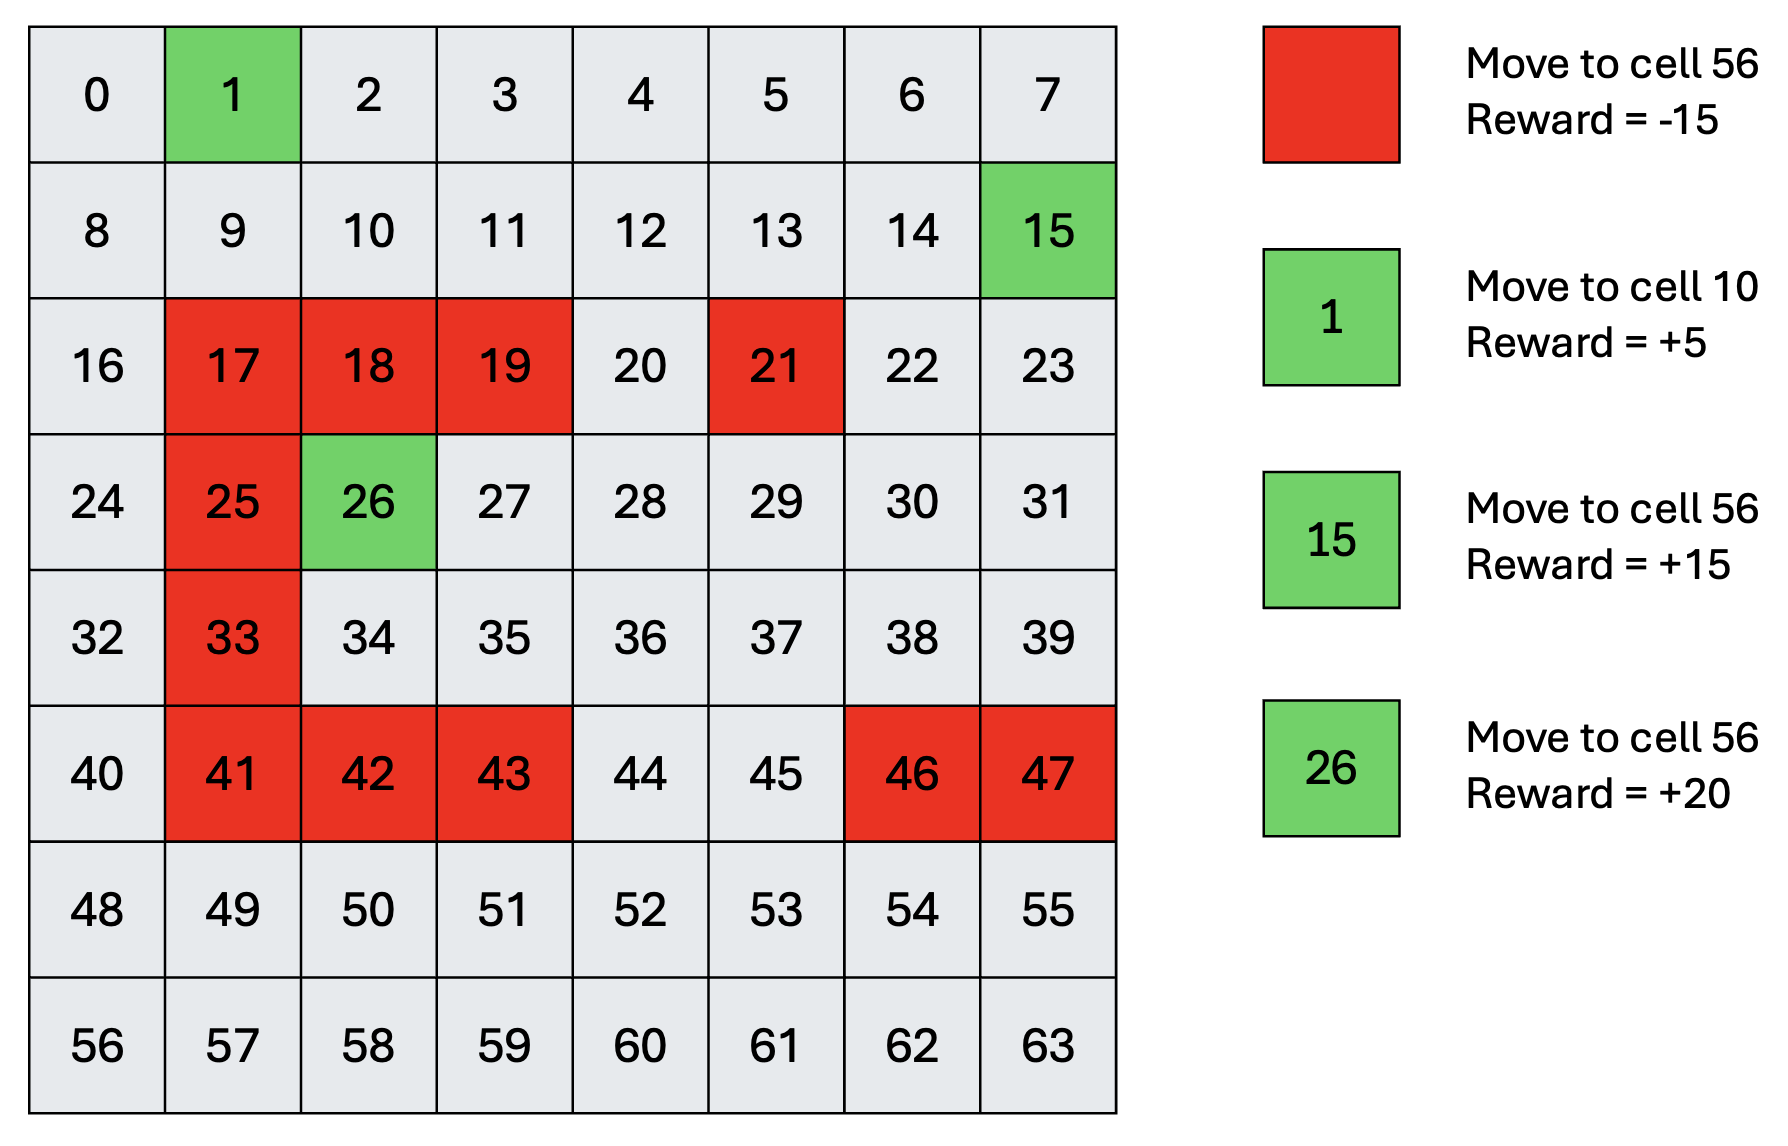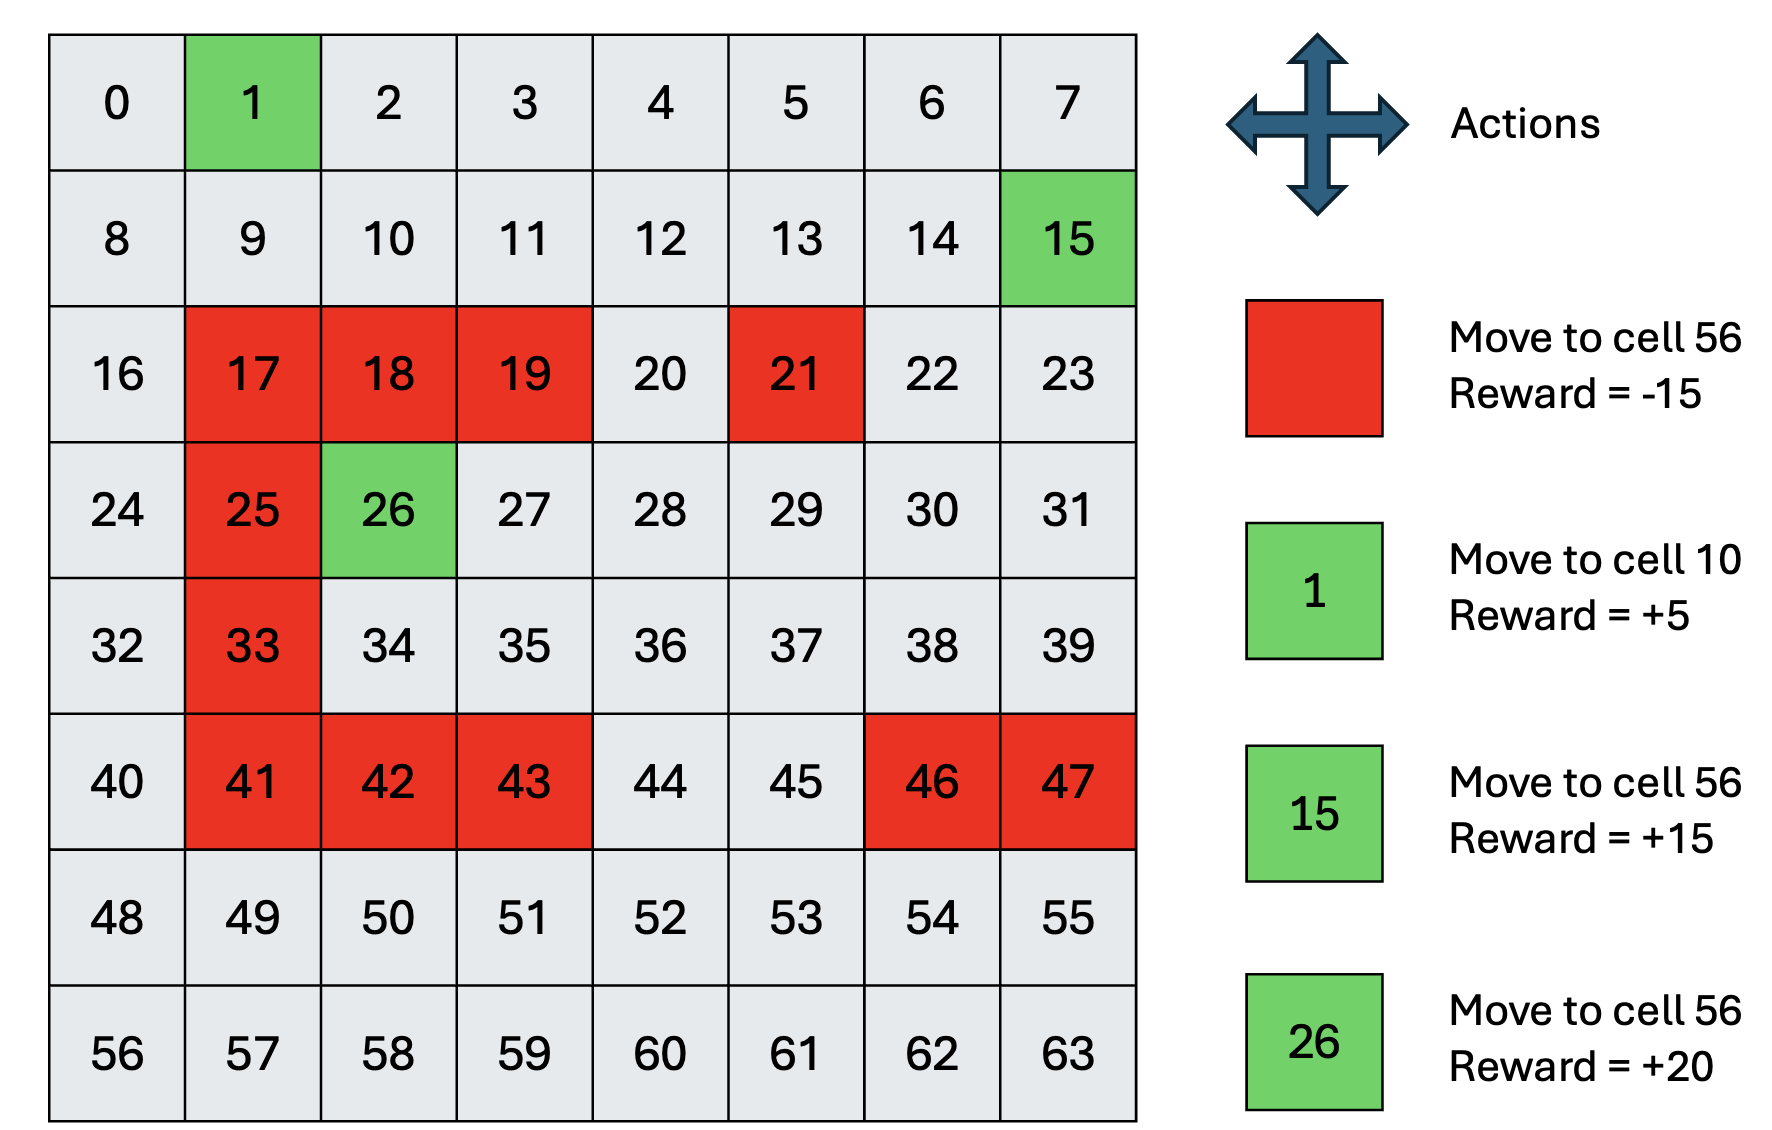)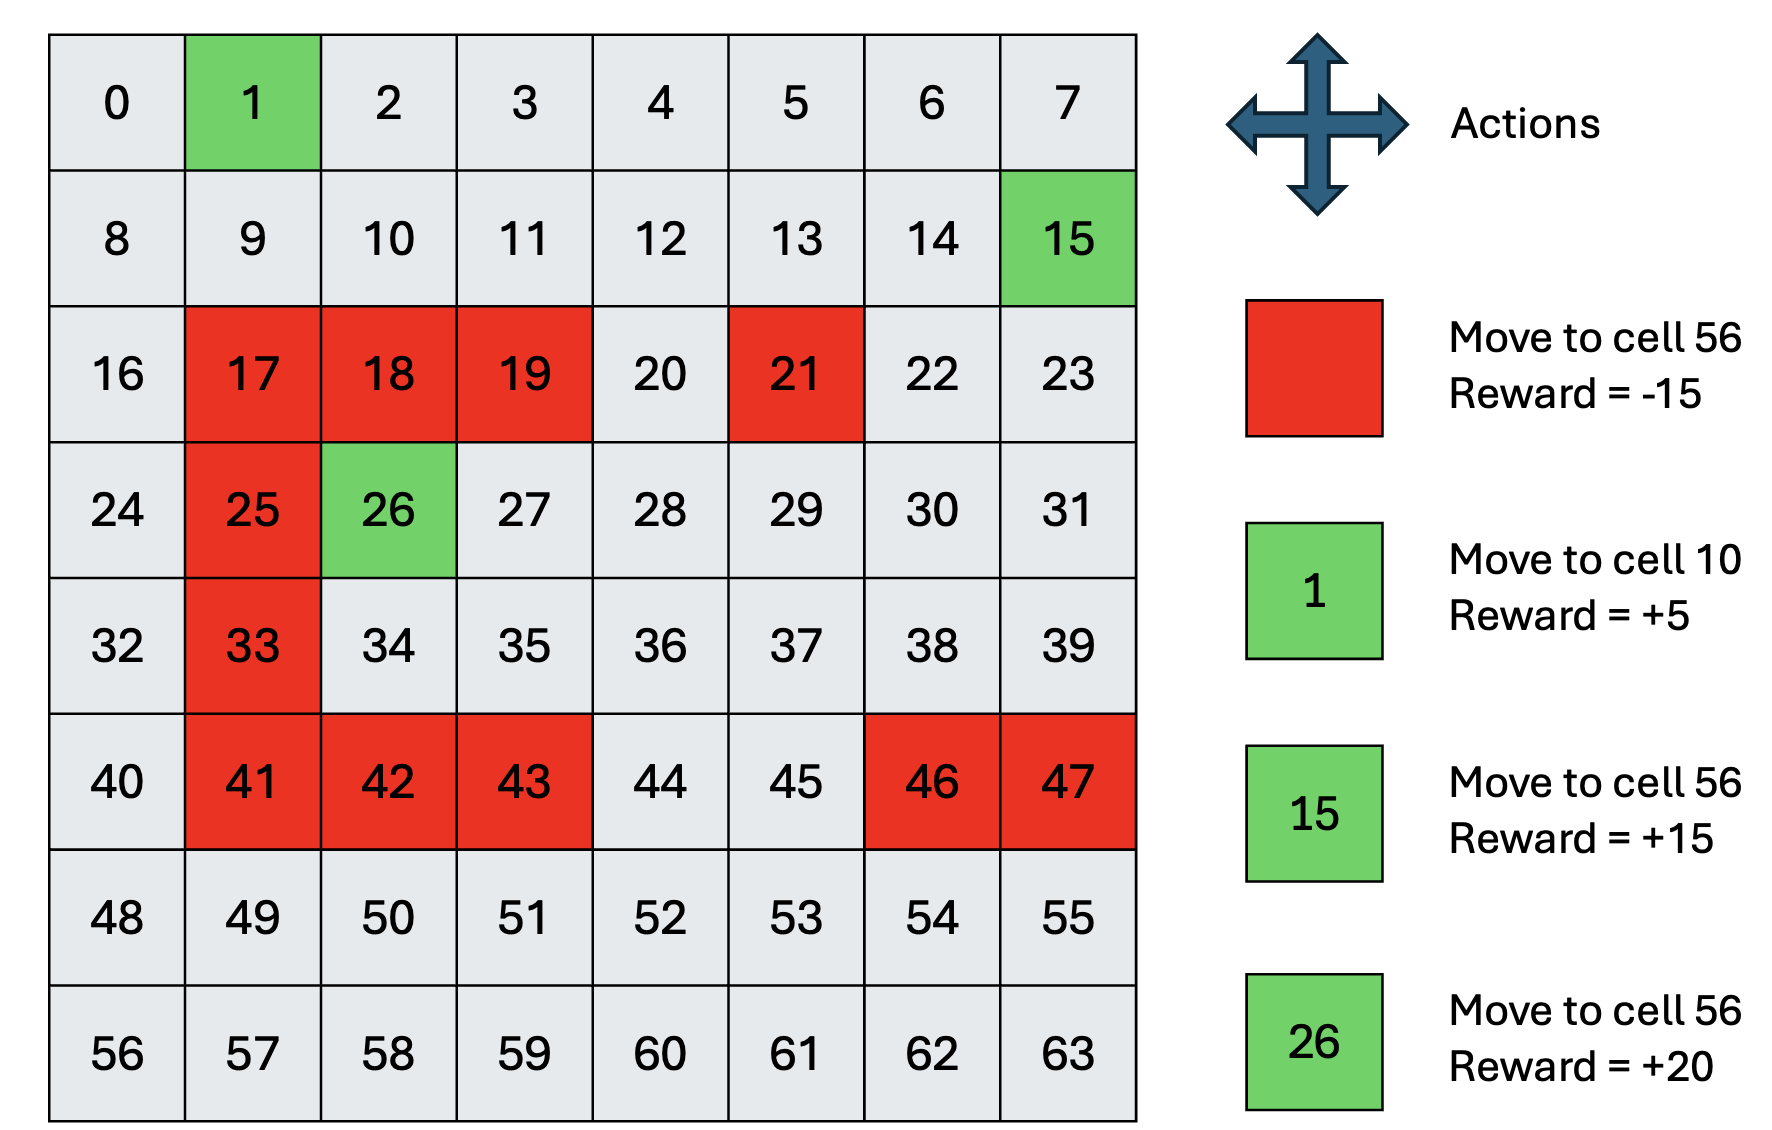

In [1]:
import numpy as np

In [2]:
class environment:
  def __init__(self, grid_height, grid_width):
    """
    The map is initialized with height and width are varible of your choice
    start: List of location where you step in, you get to the corresponding location in list 'end'
           For example:
              if you step in location start[3] then you get to new location end[3] then obtain the reward value of reward[3]
    reward: List of reward value where you move from a location in 'start' list to the corresponding location in 'end' list
    """
    self.height = grid_height
    self.width = grid_width
    self.start = []
    self.end = []
    self.reward = []
    self.map = np.array([i for i in range(grid_height * grid_width)])
    self.action_space = [0,1,2,3]

  def get_Map(self):
    print(self.map.reshape([self.width, self.height]))

  def get_NumState(self):
    return self.height * self.width

  def map_Designate(self, start_cell, end_cell, reward):
    self.start.append(start_cell)
    self.end.append(end_cell)
    self.reward.append(reward)

  def get_Observation(self, location, action):
    # Default reward = 0
    reward = 0
    new_location = 0
    # Action: UP: 0, DOWN: 1, LEFT: 2, RIGHT: 3
    # Actions that get the agent out of the map, result in no change at all
    if action == 0: #UP
      if location - self.width < 0:
        new_location = location
      else:
        new_location = location - self.width

    elif action == 1: #DOWN
      if location + self.width > self.height * self.width - 1:
        new_location = location
      else:
        new_location = location + self.width

    elif action == 2: #LEFT
      if location % self.width == 0:
        new_location = location
      else:
        new_location = location - 1

    elif action == 3: #RIGHT
      if (location + 1) % self.width == 0:
        new_location = location
      else:
        new_location = location + 1

    # If the agent is at special locations, immediately moves to corresponding destinations, gain reward
    if new_location in self.start:
      idx = self.start.index(new_location)
      new_location = self.end[idx]
      reward = self.reward[idx]

    return new_location, self.action_space, reward

## Grid map design

In [3]:
#Environment setup
Envir = environment(8,8)
Envir.get_Map()
Envir.map_Designate(17,56,-15)
Envir.map_Designate(18,56,-15)
Envir.map_Designate(19,56,-15)
Envir.map_Designate(21,56,-15)
Envir.map_Designate(25,56,-15)
Envir.map_Designate(33,56,-15)
Envir.map_Designate(41,56,-15)
Envir.map_Designate(42,56,-15)
Envir.map_Designate(43,56,-15)
Envir.map_Designate(46,56,-15)
Envir.map_Designate(47,56,-15)
Envir.map_Designate(15,56,+15)
Envir.map_Designate(1,10,+5)
Envir.map_Designate(26,56,+20)

# Check for the start, end, reward lists
for i in range(len(Envir.start)):
  print('i = '+ str(i) + '|Move to ' + str(Envir.start[i]) + ' results at ' + str(Envir.end[i]) + ' get Reward: ' + str(Envir.reward[i]))

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62 63]]
i = 0|Move to 17 results at 56 get Reward: -15
i = 1|Move to 18 results at 56 get Reward: -15
i = 2|Move to 19 results at 56 get Reward: -15
i = 3|Move to 21 results at 56 get Reward: -15
i = 4|Move to 25 results at 56 get Reward: -15
i = 5|Move to 33 results at 56 get Reward: -15
i = 6|Move to 41 results at 56 get Reward: -15
i = 7|Move to 42 results at 56 get Reward: -15
i = 8|Move to 43 results at 56 get Reward: -15
i = 9|Move to 46 results at 56 get Reward: -15
i = 10|Move to 47 results at 56 get Reward: -15
i = 11|Move to 15 results at 56 get Reward: 15
i = 12|Move to 1 results at 10 get Reward: 5
i = 13|Move to 26 results at 56 get Reward: 20


In [4]:
# Test environment
a, b, r = Envir.get_Observation(0,3) #Cell 0, move right --> resulting at cell 10, getting reward +5
print(a, r)

10 5


## MAB Agent

In [5]:
class MAB_agent:
  def __init__(self, envir, init_location):
    # Trace the reward
    self.reward_trace = []
    # initialize the first location
    self.location_now = init_location
    self.lastAction = None
    self.lastState = None
    self.value_table = {}    # format: {state : {action : [value, count]}}
    for state in range(envir.width*envir.height):
      self.value_table[state] = {}
      for action in envir.action_space:
        self.value_table[state][action] = [0,0]

  def get_TotalReward(self):
    return np.sum(self.reward_trace)

  '''
  Input: observation from the environment
        (current state, action space, previous reward)
  Output: Selected action

  TODO: Implement action selecting policy with these priorities:
  1. Highest value
  2. (If multiple actions have the highest value) Action already done in the past
  3. (If multiple actions have the highest value and same frequent) randomly select among them
  '''
  def getAction(self, observation):
    self.location_now, action_space, pre_reward = observation
    # NOTICE: the first observation is (init_location, [0,1,2,3], None)
    # You should process the 'None'
    if pre_reward is None:
      # randomly select among action space
      ########## YOUR CODE HERE ############
    else:
      self.reward_trace.append(pre_reward)
      # Updating with incremental average over reward samples
      ########## YOUR CODE HERE ############

      # get action use above priorities
      ########## YOUR CODE HERE ############


    self.lastState = self.location_now
    self.lastAction = action
    # Assert valid action
    assert action in action_space, "INVALID action taken"
    return action

IndentationError: expected an indented block after 'if' statement on line 32 (<ipython-input-5-e41f31c4462b>, line 35)

In [ ]:
# create your agent, with environment is the pre-declared Envir and init_location set to 0
init_location = 0
dummyAgent = MAB_agent(envir=Envir, init_location=init_location)

num_iter = 10000
log_freq = 1000
Data_plot1 = []
Action_record = []

for i in range(num_iter):
  env_observation = (init_location, Envir.action_space, None)
  if i > 0:
    env_observation = Envir.get_Observation(location=dummyAgent.location_now, action=chosen_action)

  chosen_action = dummyAgent.getAction(observation=env_observation)
  Action_record.append(chosen_action)
  if (i + 1) % log_freq == 0:
    aver = np.mean(dummyAgent.reward_trace)
    Data_plot1.append(aver)
    print('iter: ' + str(i + 1) + '\t Total reward: ' + str(dummyAgent.get_TotalReward()) + '\t Average: ' + str(aver))

In [ ]:
import matplotlib.pyplot as plt
Y_Cord = ["A", "B", "C", "D", "E", "F", "G", "H"]
X_Cord = ["1", "2", "3", "4", "5", "6", "7", "8"]
agent = dummyAgent

# Map = freq_list.reshape([Envir.width, Envir.height])
Map = np.zeros([Envir.width, Envir.height])
for i in range(Envir.height):
  for j in range(Envir.width):
    state = i * Envir.width + j
    if state in agent.value_table.keys():
      list_freq = [f[1] for f in agent.value_table[state].values()]
      Map[i][j] = sum(list_freq)
    else:
      Map[i][j] = 0

fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(Map, cmap="summer")

# We want to show all ticks...
ax.set_xticks(np.arange(len(X_Cord)))
ax.set_yticks(np.arange(len(Y_Cord)))
# ... and label them with the respective list entries
ax.set_xticklabels(X_Cord)
ax.set_yticklabels(Y_Cord)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(Y_Cord)):
    for j in range(len(X_Cord)):
        text = ax.text(j, i, Map[i, j],
                       ha="center", va="center", color="k")

ax.set_title("Number of actions taken, " + str(num_iter) + " time-steps", fontdict={'size':16})
# ax.set_xlabel("Alpha = " + str(learning_rate) + " Gamma = " + str(discount_factor))
fig.tight_layout()
plt.show()

## MABe Agent

In [ ]:
class MABe_agent(MAB_agent):
  def __init__(self, envir, init_location, epsilon):
    super(MABe_agent, self).__init__(envir, init_location)
    self.epsilon = epsilon


  # Override
  '''
  Now you want your agent to explore more.
  The priorities are now:
  1. With a probability of epsilon, randomly select among action space
  2. Highest value
  3. (If multiple actions have the LOWEST value) Action NOT YET done in the past
  4. (If multiple actions have the highest value and same frequent) randomly select among them
  '''
  def getAction(self, observation):
    self.location_now, action_space, pre_reward = observation
    # NOTICE: the first observation is (init_location, [0,1,2,3], None)
    # You should process the 'None'


    if pre_reward is None:
      # randomly select among action space
      ########## YOUR CODE HERE ############
    else:
      self.reward_trace.append(pre_reward)
      # Updating with incremental average over reward samples
      ########## YOUR CODE HERE ############

      # get action use above priorities
      ########## YOUR CODE HERE ############



    self.lastState = self.location_now
    self.lastAction = action
    # Assert valid action
    assert action in action_space, "INVALID action taken"
    return action

In [ ]:
# Run your MABe agent
# create your agent, with environment is the pre-declared Envir and init_location set to 0
init_location = 0
epsilon=0.1
dummyAgent_e = MABe_agent(envir=Envir, init_location=init_location, epsilon=epsilon)

num_iter = 10000
log_freq = 1000
Data_plot2 = []
Action_record = []
Location_record = []

for i in range(num_iter):
  env_observation = (init_location, Envir.action_space, None)
  if i > 0:
    env_observation = Envir.get_Observation(location=dummyAgent_e.location_now, action=chosen_action)

  chosen_action = dummyAgent_e.getAction(observation=env_observation)
  Location_record.append(env_observation[0])
  Action_record.append(chosen_action)

  if (i + 1) % log_freq == 0:
    aver = np.mean(dummyAgent_e.reward_trace)
    Data_plot2.append(aver)
    print('iter: ' + str(i + 1) + '\t Total reward: ' + str(dummyAgent_e.get_TotalReward()) + '\t Average: ' + str(aver))

In [ ]:
len(dummyAgent_e.value_table)

In [ ]:
Y_Cord = ["A", "B", "C", "D", "E", "F", "G", "H"]
X_Cord = ["1", "2", "3", "4", "5", "6", "7", "8"]
agent = dummyAgent_e

# Map = freq_list.reshape([Envir.width, Envir.height])
Map = np.zeros([Envir.width, Envir.height])
for i in range(Envir.height):
  for j in range(Envir.width):
    state = i * Envir.width + j
    if state in agent.value_table.keys():
      list_freq = [f[1] for f in agent.value_table[state].values()]
      Map[i][j] = sum(list_freq)
    else:
      Map[i][j] = 0

fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(Map, cmap="summer")

# We want to show all ticks...
ax.set_xticks(np.arange(len(X_Cord)))
ax.set_yticks(np.arange(len(Y_Cord)))
# ... and label them with the respective list entries
ax.set_xticklabels(X_Cord)
ax.set_yticklabels(Y_Cord)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(Y_Cord)):
    for j in range(len(X_Cord)):
        text = ax.text(j, i, Map[i, j],
                       ha="center", va="center", color="k")

ax.set_title("Number of actions taken, " + str(num_iter) + " time-steps", fontdict={'size':16})
# ax.set_xlabel("Alpha = " + str(learning_rate) + " Gamma = " + str(discount_factor))
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(Data_plot1, label="No exploration")
plt.plot(Data_plot2, label=r"$\epsilon$-greedy")
plt.xlabel("Step", fontsize=14)
plt.ylabel("Avg reward", fontsize=14)
plt.legend()
plt.show()

In [ ]:
Y_Cord = ["A", "B", "C", "D", "E", "F", "G", "H"]
X_Cord = ["1", "2", "3", "4", "5", "6", "7", "8"]
agent = dummyAgent_e

# Map = freq_list.reshape([Envir.width, Envir.height])
Map = np.zeros([Envir.width, Envir.height])
for i in range(Envir.height):
  for j in range(Envir.width):
    state = i * Envir.width + j
    if state in agent.value_table.keys():
      list_value = [f[0] for f in agent.value_table[state].values()]
      Map[i][j] = round(sum(list_value)/len(list_value),2)
    else:
      Map[i][j] = 0

fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(Map, cmap="summer")

# We want to show all ticks...
ax.set_xticks(np.arange(len(X_Cord)))
ax.set_yticks(np.arange(len(Y_Cord)))
# ... and label them with the respective list entries
ax.set_xticklabels(X_Cord)
ax.set_yticklabels(Y_Cord)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(Y_Cord)):
    for j in range(len(X_Cord)):
        text = ax.text(j, i, Map[i, j],
                       ha="center", va="center", color="k")

ax.set_title("State value after " + str(num_iter) + " time-steps", fontdict={'size':16})
# ax.set_xlabel("Alpha = " + str(learning_rate) + " Gamma = " + str(discount_factor))
fig.tight_layout()
plt.show()

In [ ]:
Y_Cord = ["A", "B", "C", "D", "E", "F", "G", "H"]
X_Cord = ["1", "2", "3", "4", "5", "6", "7", "8"]
agent = dummyAgent_e

def decode_action(action):
  if action == 0: #UP
    return "\u2191"
  if action == 1: #DOWN
    return "\u2193"
  if action == 2: #LEFT
    return "\u2190"
  return "\u2192" #RIGHT

Map = np.zeros([Envir.width, Envir.height])
Map_labels = [['' for _ in range(Envir.width)] for _ in range(Envir.height)]
for i in range(Envir.height):
  for j in range(Envir.width):
    state = i * Envir.width + j
    if state in agent.value_table.keys():
      list_value = [f[0] for f in agent.value_table[state].values()]
      max_value = max(list_value)
      actions = [index for index, value in enumerate(list_value) if value == max_value]
      if len(actions) > 1:
        Map_labels[i][j] = ''
        Map[i][j] = 1
      else:
        Map_labels[i][j] = decode_action(actions[0])
        Map[i][j] = 0

fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(Map,cmap='summer')

# We want to show all ticks...
ax.set_xticks(np.arange(len(X_Cord)))
ax.set_yticks(np.arange(len(Y_Cord)))
# ... and label them with the respective list entries
ax.set_xticklabels(X_Cord)
ax.set_yticklabels(Y_Cord)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(Y_Cord)):
    for j in range(len(X_Cord)):
        text = ax.text(j, i, Map_labels[i][j],
                       ha="center", va="center", color="k",fontsize=20)

ax.set_title("Directions after " + str(num_iter) + " time-steps", fontdict={'size':16})
# ax.set_xlabel("Alpha = " + str(learning_rate) + " Gamma = " + str(discount_factor))
fig.tight_layout()
plt.show()